In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/DL Project/')
print(os.getcwd())

/content/drive/My Drive/Colab Notebooks/DL Project


In [4]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import cv2
import matplotlib.pyplot as plt
import keras
from tensorflow.keras.utils import to_categorical
from keras import models
from keras import layers
from collections import Counter
from keras.callbacks import ModelCheckpoint,CSVLogger
from sklearn.metrics import classification_report,confusion_matrix
import itertools

### Extract Training set

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255)
train_set = train_datagen.flow_from_directory(
        'data/Train',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

Found 5349 images belonging to 3 classes.


In [6]:
print("Total samples in training set: ", train_set.samples)
print("Labes: ", train_set.class_indices)
print("Shape of each image: ", train_set.image_shape)

Total samples in training set:  5349
Labes:  {'Cap': 0, 'Cov': 1, 'Norm': 2}
Shape of each image:  (64, 64, 3)


Sampes in each class:  dict_items([(0, 724), (1, 2307), (2, 2318)])



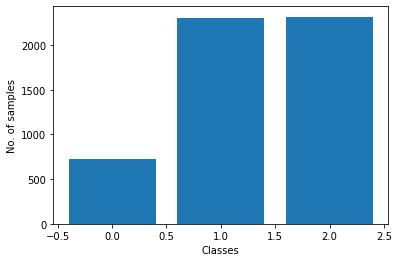

In [7]:
counter = Counter(train_set.classes)
print("Sampes in each class: ", counter.items())
print()
plt.bar(counter.keys(), counter.values())
plt.xlabel('Classes')
plt.ylabel('No. of samples')
plt.show()

### Extract validation set

In [8]:
valid_datagen = ImageDataGenerator(rescale=1./255)
valid_set = valid_datagen.flow_from_directory(
        'data/Valid',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

Found 1750 images belonging to 3 classes.


In [9]:
print("Total samples in Valid set: ", valid_set.samples)
print("Labes: ", valid_set.class_indices)
print("Shape of each image: ", valid_set.image_shape)

Total samples in Valid set:  1750
Labes:  {'Cap': 0, 'Cov': 1, 'Norm': 2}
Shape of each image:  (64, 64, 3)


Sampes in each class:  dict_items([(0, 234), (1, 758), (2, 758)])



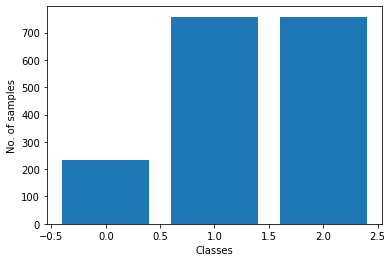

In [10]:
counter_valid = Counter(valid_set.classes)
print("Sampes in each class: ", counter_valid.items())
print()
plt.bar(counter_valid.keys(), counter_valid.values())
plt.xlabel('Classes')
plt.ylabel('No. of samples')
plt.show()

### Extract Test set

In [11]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
        'data/Test',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

Found 1720 images belonging to 3 classes.


In [12]:
print("Total samples in Test set: ", test_set.samples)
print("Labes: ", test_set.class_indices)
print("Shape of each image: ", test_set.image_shape)

Total samples in Test set:  1720
Labes:  {'Cap': 0, 'Cov': 1, 'Norm': 2}
Shape of each image:  (64, 64, 3)


Sampes in each class:  dict_items([(0, 220), (1, 750), (2, 750)])



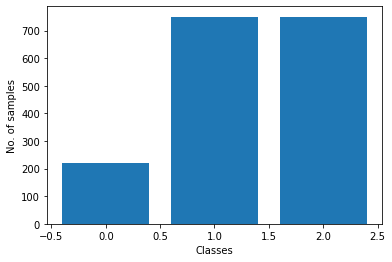

In [13]:
counter_test = Counter(test_set.classes)
print("Sampes in each class: ", counter_test.items())
print()
plt.bar(counter_test.keys(), counter_test.values())
plt.xlabel('Classes')
plt.ylabel('No. of samples')
plt.show()

## Part 2 - Building the CNN

In [14]:
from keras import models
from keras import layers

In [15]:
model = models.Sequential()

In [16]:
model.add(layers.Conv2D(6, (5,5), input_shape=(64,64,3), activation='relu', strides=(1,1), padding='valid'))
model.add(layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)))

model.add(layers.Conv2D(16, (5,5),activation='relu', strides=(1,1), padding='valid'))
model.add(layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(120, activation='relu'))
model.add(layers.Dense(84, activation='relu'))

model.add(layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 60, 60, 6)         456       
                                                                 
 average_pooling2d (AverageP  (None, 30, 30, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 13, 13, 16)       0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 2704)              0         
                                                                 
 dense (Dense)               (None, 120)               3

In [17]:
print(os.getcwd())

/content/drive/My Drive/Colab Notebooks/DL Project


In [18]:
# from keras.callbacks import ModelCheckpoint,CSVLogger
# mc = ModelCheckpoint('CNN_Disease.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)
# cv = keras.callbacks.CSVLogger('CNN_Disease.csv', separator=',', append=False)

In [21]:
model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy'])
history=model.fit(train_set, validation_data=valid_set, batch_size=64, epochs=25, verbose=1)

Epoch 1/25
168/168 [==============================] - 541s 3s/step - loss: 0.8377 - accuracy: 0.6037 - val_loss: 1.0098 - val_accuracy: 0.4434
Epoch 2/25
168/168 [==============================] - 48s 284ms/step - loss: 0.7382 - accuracy: 0.6609 - val_loss: 1.0813 - val_accuracy: 0.4177
Epoch 3/25
168/168 [==============================] - 48s 285ms/step - loss: 0.6387 - accuracy: 0.7179 - val_loss: 1.0576 - val_accuracy: 0.4823
Epoch 4/25
168/168 [==============================] - 47s 280ms/step - loss: 0.5429 - accuracy: 0.7667 - val_loss: 1.0572 - val_accuracy: 0.5029
Epoch 5/25
168/168 [==============================] - 47s 277ms/step - loss: 0.4551 - accuracy: 0.8125 - val_loss: 1.4647 - val_accuracy: 0.4320
Epoch 6/25
168/168 [==============================] - 48s 288ms/step - loss: 0.3647 - accuracy: 0.8491 - val_loss: 1.3517 - val_accuracy: 0.4657
Epoch 7/25
168/168 [==============================] - 49s 295ms/step - loss: 0.2929 - accuracy: 0.8865 - val_loss: 1.6801 - val_accu

In [22]:
model.evaluate(test_set)

54/54 [==============================] - 295s 6s/step - loss: 3.5661 - accuracy: 0.4907


[3.566112756729126, 0.4906976819038391]

In [23]:
test_loss,test_acc = model.evaluate(test_set)
print(test_loss)
print(test_acc)

54/54 [==============================] - 12s 215ms/step - loss: 3.5661 - accuracy: 0.4907
3.566113233566284
0.4906976819038391


In [24]:
train_loss = history.history['loss']
train_acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']
xc=range(len(train_loss))

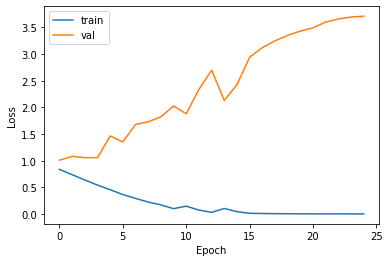

In [25]:
plt.plot(xc, train_loss)
plt.plot(xc, val_loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['train','val'])

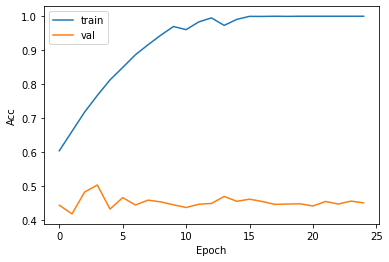

In [26]:
plt.plot(xc, train_acc)
plt.plot(xc, val_acc)
plt.xlabel("Epoch")
plt.ylabel("Acc")
plt.legend(['train','val'])